Diâmetro otimizado: 33.50781206141792
Pressão máxima correspondente: 1.1991767267577524
Temperatura mínima correspondente: 294.6821699545759


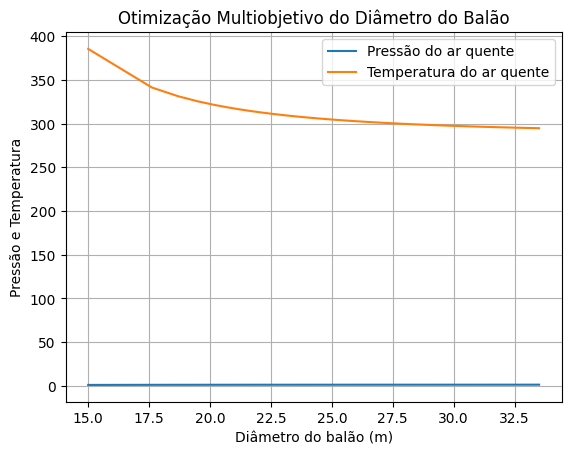

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*np.pi*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return air_pressure, temp_air

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69) * persons_newton
    new_load = new_persons_newton + load
    return new_load

# Função para calcular o gradiente da pressão do ar quente em relação ao diâmetro
def gradient_pressure(diameter, load, temperature, gravity, atmosphere_pressure, people):
    h = 1e-5  # Passo de diferenciação
    grad = (activity_2(diameter + h, load, temperature, gravity, atmosphere_pressure, people)[0] - activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[0]) / h
    return grad

# Função para calcular o gradiente da temperatura do ar quente em relação ao diâmetro
def gradient_temperature(diameter, load, temperature, gravity, atmosphere_pressure, people):
    h = 1e-5  # Passo de diferenciação
    grad = (activity_2(diameter + h, load, temperature, gravity, atmosphere_pressure, people)[1] - activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[1]) / h
    return grad

# Parâmetros iniciais
load = 2670
temperature = 288
gravity = 9.81 
atmosphere_pressure = 1.227
people = 4  # Número de pessoas

# Taxa de aprendizado (tamanho do passo)
learning_rate = 0.1

# Número de iterações
num_iterations = 100

# Diâmetro inicial
diameter = 15

# Lista para armazenar os valores do diâmetro, pressão do ar quente e temperatura do ar quente em cada iteração
diameter_history = [diameter]
pressure_history = [activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[0]]
temperature_history = [activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[1]]

# Gradiente descendente
for i in range(num_iterations):
    grad_pressure = gradient_pressure(diameter, load, temperature, gravity, atmosphere_pressure, people)
    grad_temperature = gradient_temperature(diameter, load, temperature, gravity, atmosphere_pressure, people)
    # Atualização do diâmetro
    diameter += learning_rate * grad_pressure - learning_rate * grad_temperature  # Combinação dos gradientes
    # Atualização dos históricos
    pressure = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[0]
    temp = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[1]
    diameter_history.append(diameter)
    pressure_history.append(pressure)
    temperature_history.append(temp)

# Resultados
print("Diâmetro otimizado:", diameter)
print("Pressão máxima correspondente:", pressure_history[-1])
print("Temperatura mínima correspondente:", temperature_history[-1])

# Plotagem para visualização
plt.plot(diameter_history, pressure_history, label='Pressão do ar quente')
plt.plot(diameter_history, temperature_history, label='Temperatura do ar quente')
plt.xlabel('Diâmetro do balão (m)')
plt.ylabel('Pressão e Temperatura')
plt.title('Otimização Multiobjetivo do Diâmetro do Balão')
plt.legend()
plt.grid(True)
plt.show()
